[I 2021-08-19 14:58:34,716] A new study created in memory with name: no-name-e1599f87-25fb-4024-b4a5-42a9d6dc2b4b


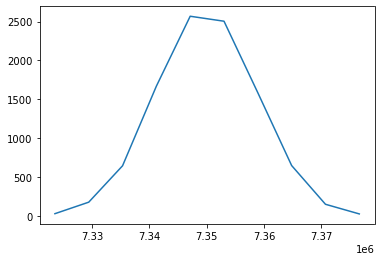

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import optuna, secrets
from optuna.samplers import RandomSampler

rng = secrets.SystemRandom()

study = optuna.create_study(sampler=RandomSampler())
# study.optimize(v.min(),n_trials=10)
# gv = []
# for i in range(100):
#     g =rng.gauss(7352800, 8574.85)
#     gv.append(g)
# plt.plot(gv)

r = np.random.normal(scale = 8574.85, size = 10000)  # sqrt(7352800) = 8574.85
v = 7352800 + r

Hv= np.histogram(v)
plt.plot(Hv[1][0:-1], Hv[0])
plt.show()



In [15]:
dir = "kimura-journal/"
photofis_loss = np.loadtxt(dir + "loss to photofission - raw MCNP output.txt", skiprows = 1)
print(photofis_loss)
histories = 1e8
photofis_loss = np.stack(photofis_loss).T

PFloss = photofis_loss[1:]*histories
sigma = np.sqrt(PFloss)
print(PFloss)
print("=======================================")
print(sigma)
print(PFloss.shape[1])
print(PFloss[2,1])

[[1.000e+00 2.194e-05 2.553e-05 4.024e-05 4.847e-04]
 [2.000e+00 2.230e-05 2.972e-05 4.468e-05 5.042e-04]
 [3.000e+00 2.300e-05 3.816e-05 5.284e-05 5.430e-04]
 [4.000e+00 2.364e-05 4.681e-05 6.125e-05 5.819e-04]
 [5.000e+00 2.640e-05 5.513e-05 7.505e-05 7.291e-04]
 [6.000e+00 3.276e-05 5.828e-05 9.351e-05 1.018e-03]
 [7.000e+00 1.587e-05 6.044e-05 5.370e-05 2.661e-04]
 [8.000e+00 1.843e-05 6.042e-05 5.971e-05 3.728e-04]
 [9.000e+00 2.065e-05 6.027e-05 6.511e-05 4.810e-04]
 [1.000e+01 2.326e-05 5.981e-05 7.053e-05 5.879e-04]]
[[  2194.   2230.   2300.   2364.   2640.   3276.   1587.   1843.   2065.
    2326.]
 [  2553.   2972.   3816.   4681.   5513.   5828.   6044.   6042.   6027.
    5981.]
 [  4024.   4468.   5284.   6125.   7505.   9351.   5370.   5971.   6511.
    7053.]
 [ 48470.  50420.  54300.  58190.  72910. 101800.  26610.  37280.  48100.
   58790.]]
[[ 46.84015371  47.22287581  47.95831523  48.62098312  51.38093031
   57.23635209  39.83716857  42.93017587  45.44227107  48.228

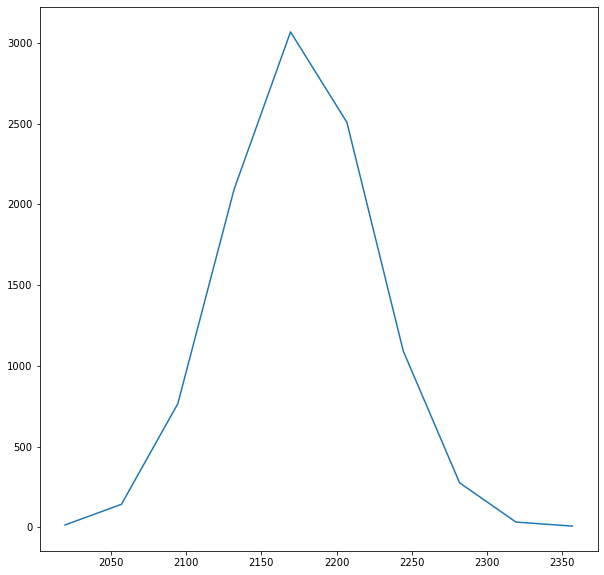

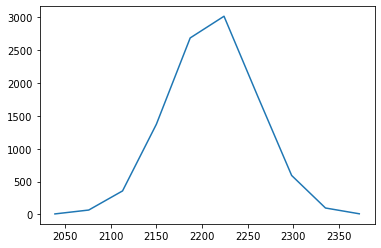

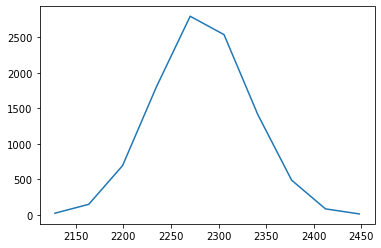

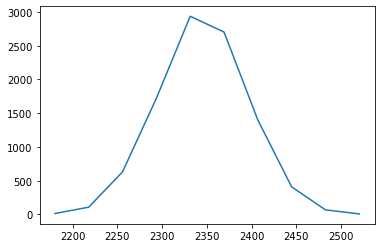

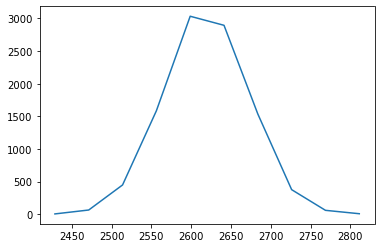

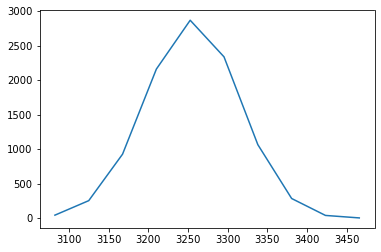

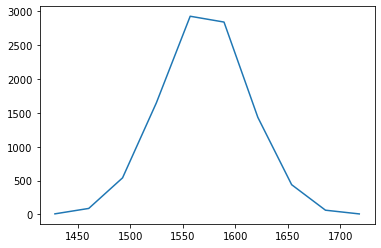

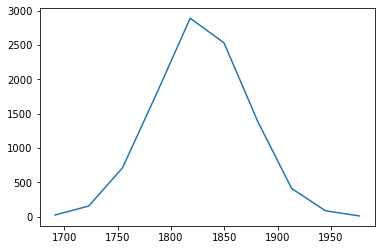

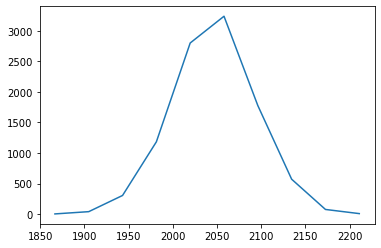

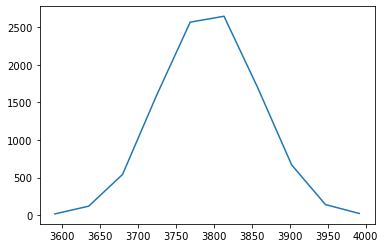

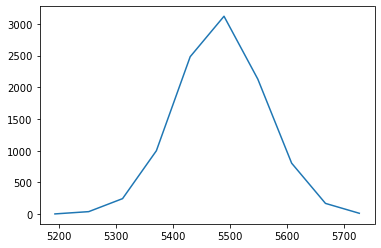

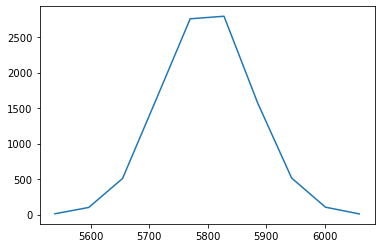

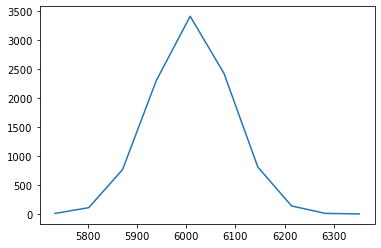

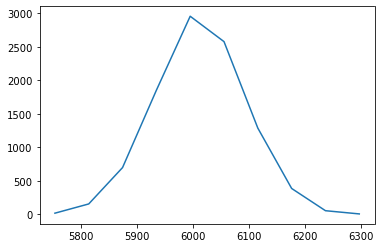

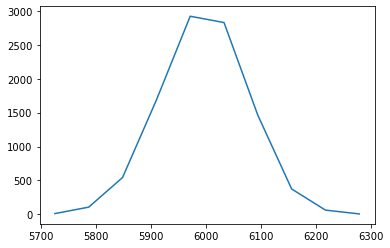

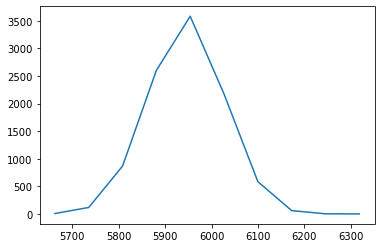

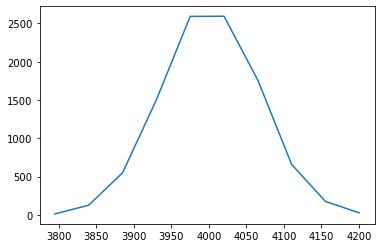

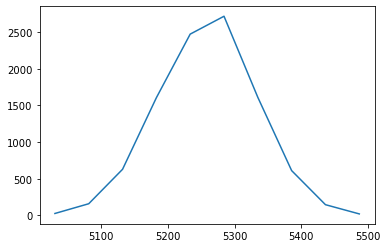

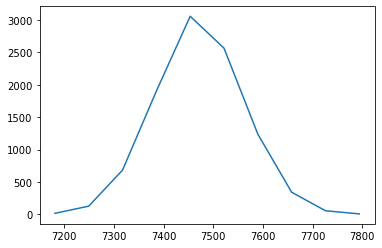

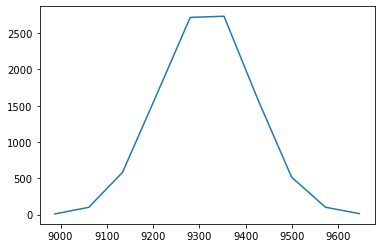

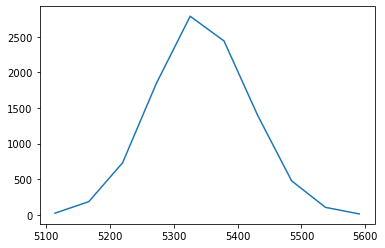

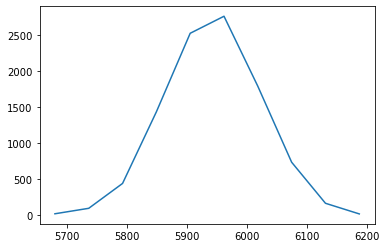

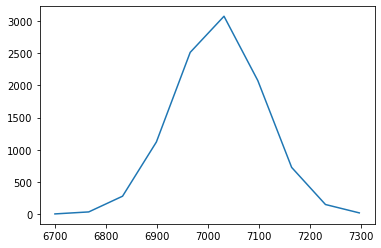

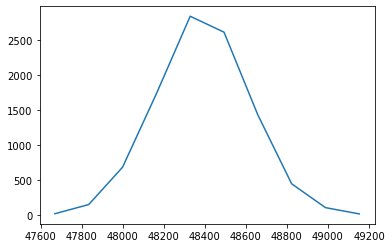

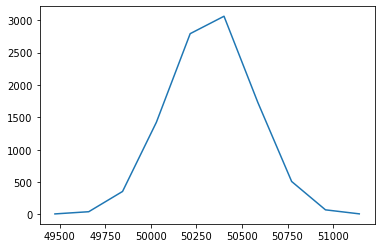

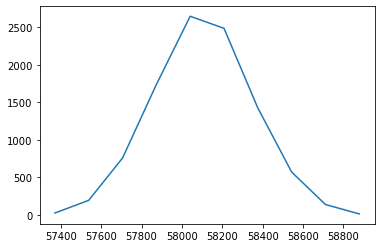

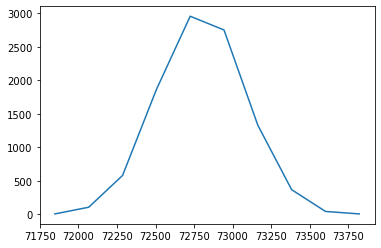

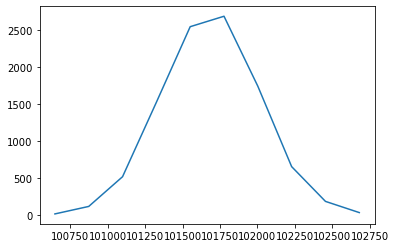

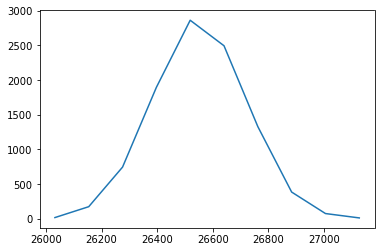

In [16]:
plt.figure(figsize = (10,10))
for i in range(PFloss.shape[0]):
    for j in range(PFloss.shape[1]):
        r = np.random.normal(scale = sigma[i,j], size = 10000)
        v = PFloss[i,j] + r

        Hv= np.histogram(v)
        plt.plot(Hv[1][0:-1], Hv[0])
        plt.show()

In [25]:
######################################################
## Photofission reaction with relative error from MCNP
######################################################

photofis_rxn = np.loadtxt(dir + "photofission reaction - raw MCNP output.txt")
photofis_rxn = photofis_rxn.T
print(photofis_rxn)

err = 0.0001

rel_err = histories * photofis_rxn * err * np.ones((4,10), dtype=float)
print(rel_err)


[[0.00447 0.00452 0.00462 0.00473 0.00532 0.00659 0.00316 0.00365 0.00414
  0.00463]
 [0.00529 0.00614 0.00783 0.00953 0.0112  0.0119  0.0123  0.0122  0.0122
  0.0121 ]
 [0.00841 0.00923 0.0109  0.0125  0.0153  0.0191  0.011   0.0121  0.0133
  0.0144 ]
 [0.0997  0.103   0.111   0.119   0.148   0.206   0.0537  0.0755  0.0973
  0.119  ]]
[[  44.7   45.2   46.2   47.3   53.2   65.9   31.6   36.5   41.4   46.3]
 [  52.9   61.4   78.3   95.3  112.   119.   123.   122.   122.   121. ]
 [  84.1   92.3  109.   125.   153.   191.   110.   121.   133.   144. ]
 [ 997.  1030.  1110.  1190.  1480.  2060.   537.   755.   973.  1190. ]]


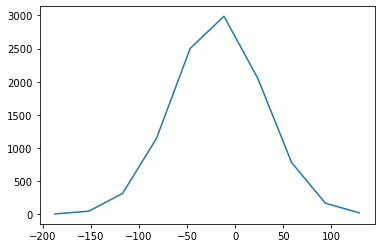

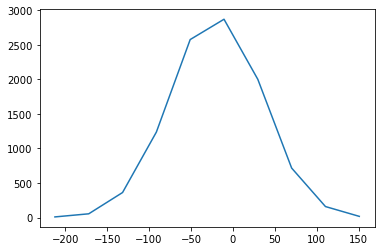

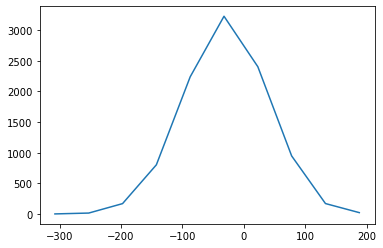

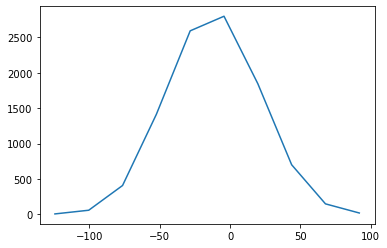

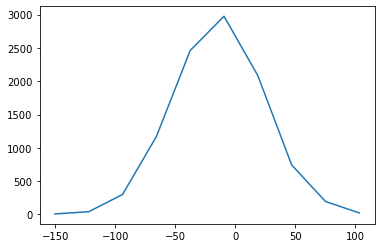

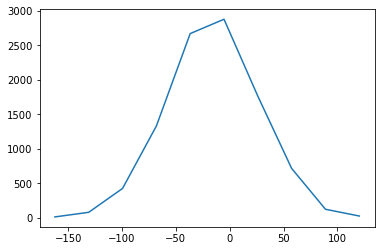

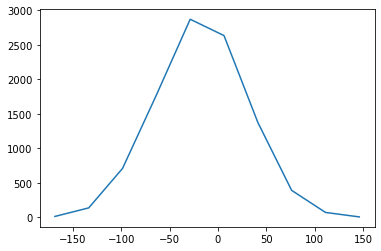

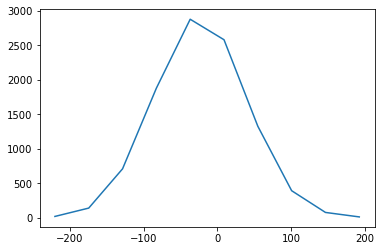

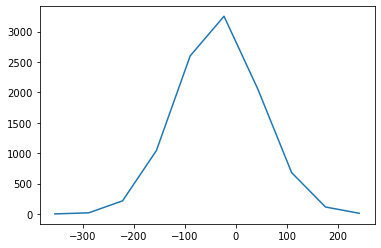

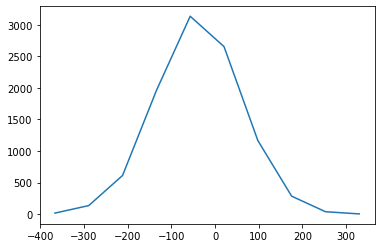

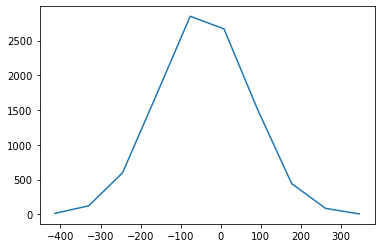

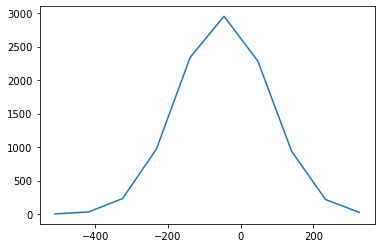

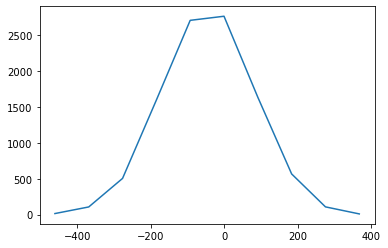

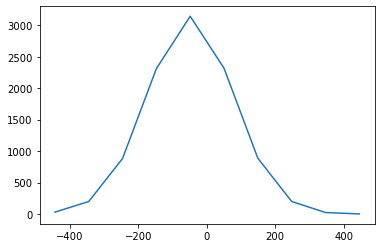

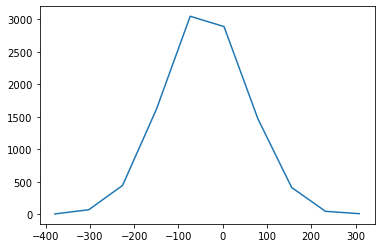

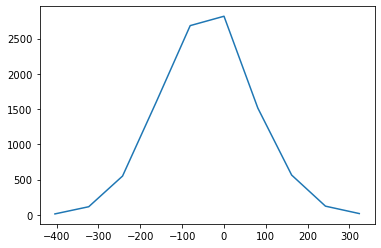

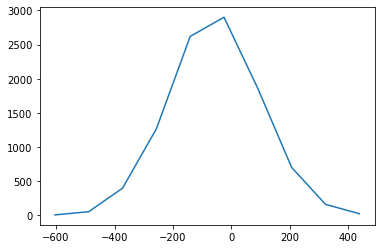

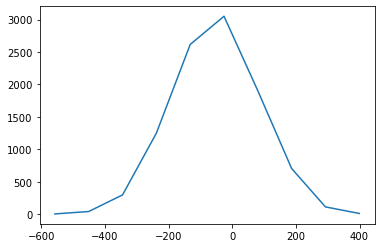

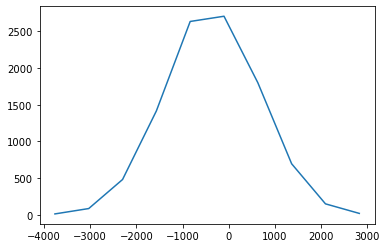

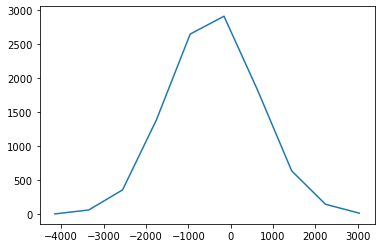

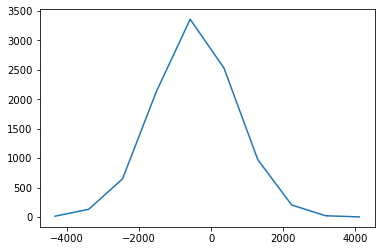

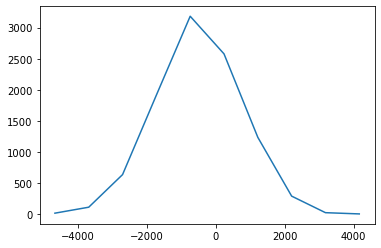

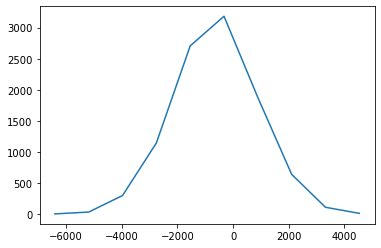

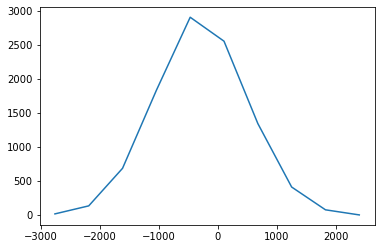

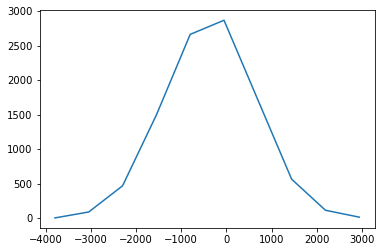

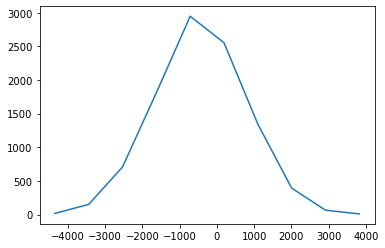

In [26]:
plt.figure(figsize = (10,10))
for i in range(photofis_rxn.shape[0]):
    for j in range(photofis_rxn.shape[1]):
        r = np.random.normal(scale = rel_err[i,j], size = 10000)
        v = photofis_rxn[i,j] + r

        Hv= np.histogram(v)
        plt.plot(Hv[1][0:-1], Hv[0])
        plt.show()